## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential, load_model

In [4]:
from keras.layers import GRU

In [5]:
import yfinance as yf

In [6]:
from sklearn.metrics import mean_squared_error

In [7]:
from math import ceil, floor, sqrt

## Stock Data Extraction

In [8]:
start = '2012-12-31'
end = '2023-01-01'

df_data = yf.download('SBIN.NS', start , end)

[*********************100%***********************]  1 of 1 completed


In [9]:
df_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,237.000000,239.669998,236.865005,238.550003,217.295471,10006870
2013-01-01,240.490005,243.404999,239.755005,242.645004,221.025635,17202300
2013-01-02,245.000000,246.399994,243.815002,245.054993,223.220886,14660120
2013-01-03,246.000000,248.240005,243.619995,247.160004,225.138336,20103090
2013-01-04,246.000000,249.294998,245.065002,248.669998,226.513794,13705950
...,...,...,...,...,...,...
2022-12-26,574.000000,601.700012,570.700012,597.099976,597.099976,13201587
2022-12-27,600.400024,603.099976,593.299988,601.900024,601.900024,9638618
2022-12-28,600.900024,607.000000,598.549988,601.049988,601.049988,7988631


In [10]:
df_data.tail(756)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-18,335.000000,335.549988,325.799988,326.950012,318.980988,26449075
2019-12-19,327.350006,329.600006,324.500000,328.149994,320.151733,27516289
2019-12-20,330.350006,339.500000,330.350006,337.850006,329.615326,51839714
2019-12-23,335.700012,338.850006,330.350006,332.399994,324.298157,30150335
2019-12-24,333.200012,334.200012,329.200012,331.450012,323.371307,21747782
...,...,...,...,...,...,...
2022-12-26,574.000000,601.700012,570.700012,597.099976,597.099976,13201587
2022-12-27,600.400024,603.099976,593.299988,601.900024,601.900024,9638618
2022-12-28,600.900024,607.000000,598.549988,601.049988,601.049988,7988631


In [11]:
df = df_data

In [12]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,237.000000,239.669998,236.865005,238.550003,217.295471,10006870
2013-01-01,240.490005,243.404999,239.755005,242.645004,221.025635,17202300
2013-01-02,245.000000,246.399994,243.815002,245.054993,223.220886,14660120
2013-01-03,246.000000,248.240005,243.619995,247.160004,225.138336,20103090
2013-01-04,246.000000,249.294998,245.065002,248.669998,226.513794,13705950
...,...,...,...,...,...,...
2022-12-26,574.000000,601.700012,570.700012,597.099976,597.099976,13201587
2022-12-27,600.400024,603.099976,593.299988,601.900024,601.900024,9638618
2022-12-28,600.900024,607.000000,598.549988,601.049988,601.049988,7988631


## Splitting into Training and Testing set

In [13]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1728, 1)
(741, 1)


In [14]:
data_testing.head()

,Close
Date,
2020-01-09,330.200012
2020-01-10,332.250000
2020-01-13,330.750000
2020-01-14,328.000000
2020-01-15,324.250000


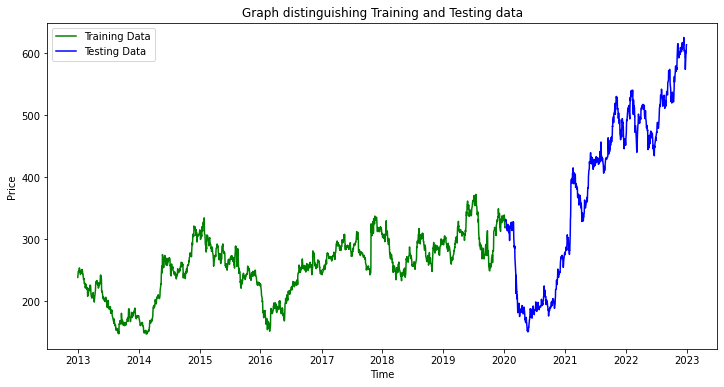

In [15]:
plt.figure(figsize=(12,6))
plt.title('Graph distinguishing Training and Testing data')
plt.plot(data_training,'g', label='Training Data')
plt.plot(data_testing,'b', label='Testing Data')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [16]:
sc = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_arr = sc.fit_transform(data_training)
data_training_arr

array([[0.40521687],
       [0.42341364],
       [0.4341228 ],
       ...,
       [0.76270887],
       [0.76004265],
       [0.76626374]])

In [18]:
data_training_arr.shape

(1728, 1)

In [19]:
x_train = []
y_train = []

for i in range(100,data_training_arr.shape[0]):
    x_train.append(data_training_arr[i-100:i])
    y_train.append(data_training_arr[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
x_train.shape

(1628, 100, 1)

## Model Training

### Traditional LSTM (4 layers)

In [21]:
# 4 layer LSTM

# 4layerlstm_model = Sequential()
# 4layerlstm_model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
# 4layerlstm_model.add(Dropout(0.3))

# 4layerlstm_model.add(LSTM(units=50, activation='relu', return_sequences=True))
# 4layerlstm_model.add(Dropout(0.3))

# 4layerlstm_model.add(LSTM(units=50, activation='relu', return_sequences=True))
# 4layerlstm_model.add(Dropout(0.3))

# 4layerlstm_model.add(LSTM(units=50, activation='relu'))
# 4layerlstm_model.add(Dropout(0.3))

# 4layerlstm_model.add(Dense(units=1))

In [22]:
# 4layerlstm_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# 4layerlstm_model.fit(x_train, y_train, epochs = 50)

In [23]:
# 4layerlstm_model.save('4layerLSTM.h5')

### Traditional GRU (4 layers)

In [24]:
# 4 layer GRU

# 4layergru_model = Sequential()
# 4layergru_model.add(GRU(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
# 4layergru_model.add(Dropout(0.3))

# 4layergru_model.add(GRU(units=50, activation='relu', return_sequences=True))
# 4layergru_model.add(Dropout(0.3))

# 4layergru_model.add(GRU(units=50, activation='relu', return_sequences=True))
# 4layergru_model.add(Dropout(0.3))

# 4layergru_model.add(GRU(units=50, activation='relu'))
# 4layergru_model.add(Dropout(0.3))

# 4layergru_model.add(Dense(units=1))

In [25]:
# 4layergru_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# 4layergru_model.fit(x_train, y_train, epochs = 50)

In [26]:
# 4layergru_model.save('4layerGRU.h5')

### Hybrid LSTM-GRU (4 layers)

In [27]:
# 4 layer LSTM-GRU hybrid

# 4layerlstmgru_model = Sequential()
# 4layerlstmgru_model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
# 4layerlstmgru_model.add(Dropout(0.3))

# 4layerlstmgru_model.add(GRU(units=50, activation='relu', return_sequences=True))
# 4layerlstmgru_model.add(Dropout(0.3))

# 4layerlstmgru_model.add(LSTM(units=50, activation='relu', return_sequences=True))
# 4layerlstmgru_model.add(Dropout(0.3))

# 4layerlstmgru_model.add(GRU(units=50, activation='relu'))
# 4layerlstmgru_model.add(Dropout(0.3))

# 4layerlstmgru_model.add(Dense(units=1))

In [28]:
# 4layerlstmgru_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# 4layerlstmgru_model.fit(x_train, y_train, epochs = 50)

In [29]:
# 4layerlstmgru_model.save('4layerLSTM-GRU.h5')

### Hybrid LSTM-GRU (6 layers)

In [30]:
# 6 layer LSTM-GRU hybrid

# 6layerlstmgru_model = Sequential()
# 6layerlstmgru_model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
# 6layerlstmgru_model.add(Dropout(0.3))

# 6layerlstmgru_model.add(GRU(units=50, activation='relu', return_sequences=True))
# 6layerlstmgru_model.add(Dropout(0.3))

# 6layerlstmgru_model.add(LSTM(units=50, activation='relu', return_sequences=True))
# 6layerlstmgru_model.add(Dropout(0.3))

# 6layerlstmgru_model.add(GRU(units=50, activation='relu', return_sequences=True))
# 6layerlstmgru_model.add(Dropout(0.3))

# 6layerlstmgru_model.add(LSTM(units=50, activation='relu', return_sequences=True))
# 6layerlstmgru_model.add(Dropout(0.3))

# 6layerlstmgru_model.add(GRU(units=50, activation='relu'))
# 6layerlstmgru_model.add(Dropout(0.3))

# 6layerlstmgru_model.add(Dense(units=1))

In [31]:
# 6layerlstmgru_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# 6layerlstmgru_model.fit(x_train, y_train, epochs = 50)

In [32]:
# 6layerlstmgru_model.save('6layerLSTM-GRU.h5')

In [33]:
data_testing.head()

,Close
Date,
2020-01-09,330.200012
2020-01-10,332.250000
2020-01-13,330.750000
2020-01-14,328.000000
2020-01-15,324.250000


In [34]:
past_100_days = data_training.tail(100)

In [35]:
final = past_100_days.append(data_testing)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12876\3032281000.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = past_100_days.append(data_testing)


In [36]:
final.head()

,Close
Date,
2019-08-09,291.350006
2019-08-13,283.350006
2019-08-14,289.750000
2019-08-16,290.899994
2019-08-19,286.850006


In [37]:
input_data = sc.fit_transform(final)
input_data

array([[0.29600759],
       [0.27915306],
       [0.29263667],
       [0.2950595 ],
       [0.28652692],
       [0.27989046],
       [0.26661749],
       [0.24797215],
       [0.25334457],
       [0.27251661],
       [0.28410409],
       [0.2824186 ],
       [0.26050773],
       [0.25913832],
       [0.24765615],
       [0.26177184],
       [0.25797953],
       [0.25934901],
       [0.26788159],
       [0.283156  ],
       [0.28694824],
       [0.29674499],
       [0.28199728],
       [0.25934901],
       [0.27293793],
       [0.25955964],
       [0.31781314],
       [0.34320024],
       [0.31970926],
       [0.27262192],
       [0.27599284],
       [0.27462342],
       [0.25271249],
       [0.2214263 ],
       [0.21763402],
       [0.2087854 ],
       [0.20699463],
       [0.23196041],
       [0.21763402],
       [0.21847677],
       [0.22037289],
       [0.22669337],
       [0.22163696],
       [0.24144108],
       [0.25028966],
       [0.25208047],
       [0.26250923],
       [0.235

In [38]:
input_data.shape

(841, 1)

In [39]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [40]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [41]:
x_test.shape

(741, 100, 1)

In [42]:
mi = final['Close'].min()
ma = final['Close'].max()

In [43]:
#Turning target data into its original values

y_test_og = y_test*(ma-mi)+mi

In [44]:
y_test_og

array([330.20001221, 332.25      , 330.75      , 328.        ,
       324.25      , 323.29998779, 318.        , 314.        ,
       313.70001221, 316.1499939 , 323.20001221, 324.04998779,
       316.20001221, 315.1000061 , 316.45001221, 310.70001221,
       318.45001221, 298.1000061 , 306.25      , 311.        ,
       321.95001221, 320.54998779, 318.5       , 324.3500061 ,
       320.20001221, 327.45001221, 319.3999939 , 314.20001221,
       317.54998779, 320.3500061 , 327.6499939 , 322.95001221,
       326.79998779, 328.20001221, 321.95001221, 303.        ,
       287.3999939 , 289.8500061 , 285.29998779, 288.5       ,
       270.5       , 253.44999695, 245.1000061 , 212.6000061 ,
       242.        , 223.3500061 , 215.1499939 , 215.19999695,
       203.6499939 , 209.8500061 , 181.6000061 , 183.19999695,
       189.8999939 , 192.75      , 195.94999695, 186.8999939 ,
       196.8500061 , 186.55000305, 175.5       , 186.3999939 ,
       183.        , 187.75      , 183.5       , 182.35

### Loading the already trained models

In [45]:
lstm4 = load_model('4layerLSTM.h5')

In [46]:
gru4 = load_model('4layerGRU.h5')

In [47]:
lstmgru4 = load_model('4layerLSTM-GRU.h5')

In [48]:
lstmgru6 = load_model('6layerLSTM-GRU.h5')

## Making predictions using the 4 models

In [49]:
# 4 layer LSTM predictions

y_lstm4 = lstm4.predict(x_test)

24/24 [==============================] - 3s 52ms/step


In [50]:
y_lstm4.shape

(741, 1)

In [51]:
y_lstm4

array([[0.36418128],
       [0.36015296],
       [0.36408344],
       [0.3708878 ],
       [0.3757602 ],
       [0.376254  ],
       [0.37341473],
       [0.36671236],
       [0.35773993],
       [0.34913236],
       [0.34322137],
       [0.34325293],
       [0.34817275],
       [0.35074684],
       [0.35006684],
       [0.3484575 ],
       [0.34442317],
       [0.34279412],
       [0.33604422],
       [0.32952768],
       [0.32645744],
       [0.3313627 ],
       [0.34028113],
       [0.3483125 ],
       [0.35696003],
       [0.36236307],
       [0.36805654],
       [0.36907753],
       [0.36389977],
       [0.35791007],
       [0.354184  ],
       [0.35648137],
       [0.3599141 ],
       [0.36469686],
       [0.37027332],
       [0.3717947 ],
       [0.36230302],
       [0.3461806 ],
       [0.32789522],
       [0.3102892 ],
       [0.2962739 ],
       [0.28247014],
       [0.26607335],
       [0.24793035],
       [0.22556512],
       [0.20670004],
       [0.19022782],
       [0.175

In [52]:
#Turning lstm model predictions into its original values

y_lstm4_og = y_lstm4*(ma-mi)+mi

In [53]:
y_lstm4_og

array([[323.70865],
       [321.7966 ],
       [323.6622 ],
       [326.8919 ],
       [329.2046 ],
       [329.43896],
       [328.0913 ],
       [324.91003],
       [320.65125],
       [316.56567],
       [313.76   ],
       [313.77502],
       [316.1102 ],
       [317.33197],
       [317.00922],
       [316.24536],
       [314.33044],
       [313.55725],
       [310.3534 ],
       [307.2603 ],
       [305.80304],
       [308.1313 ],
       [312.36444],
       [316.1765 ],
       [320.28107],
       [322.84564],
       [325.54803],
       [326.03265],
       [323.575  ],
       [320.732  ],
       [318.96344],
       [320.0539 ],
       [321.68323],
       [323.95337],
       [326.60022],
       [327.32236],
       [322.81714],
       [315.1646 ],
       [306.48547],
       [298.12878],
       [291.4764 ],
       [284.92444],
       [277.14172],
       [268.53015],
       [257.9145 ],
       [248.96017],
       [241.14163],
       [233.94484],
       [227.72804],
       [221.86435],


In [54]:
# 4 layer gru predictions

y_gru4 = gru4.predict(x_test)

24/24 [==============================] - 4s 90ms/step


In [55]:
y_gru4.shape

(741, 1)

In [56]:
y_gru4

array([[0.37330022],
       [0.37075406],
       [0.36952937],
       [0.36922792],
       [0.369251  ],
       [0.36907417],
       [0.36852294],
       [0.3667099 ],
       [0.36341536],
       [0.35934585],
       [0.35547733],
       [0.35319793],
       [0.35243648],
       [0.3515076 ],
       [0.3500193 ],
       [0.3484555 ],
       [0.34623662],
       [0.34466916],
       [0.34065956],
       [0.3360825 ],
       [0.33268604],
       [0.33188304],
       [0.3329493 ],
       [0.33465457],
       [0.33733964],
       [0.3401335 ],
       [0.3435022 ],
       [0.34632188],
       [0.34739223],
       [0.34760356],
       [0.34786117],
       [0.34914356],
       [0.35088852],
       [0.35301036],
       [0.35538653],
       [0.35730812],
       [0.35522133],
       [0.3478445 ],
       [0.3382122 ],
       [0.32791567],
       [0.31878218],
       [0.30867338],
       [0.2970735 ],
       [0.28463897],
       [0.27067265],
       [0.25764287],
       [0.24529399],
       [0.233

In [57]:
#Turning gru model predictions into its original values

y_gru4_og = y_gru4*(ma-mi)+mi

In [58]:
y_gru4_og

array([[328.03696],
       [326.82843],
       [326.24713],
       [326.10403],
       [326.115  ],
       [326.03107],
       [325.7694 ],
       [324.90887],
       [323.3451 ],
       [321.4135 ],
       [319.57733],
       [318.49542],
       [318.13397],
       [317.69308],
       [316.98666],
       [316.2444 ],
       [315.19122],
       [314.4472 ],
       [312.54407],
       [310.37155],
       [308.75943],
       [308.3783 ],
       [308.8844 ],
       [309.6938 ],
       [310.96826],
       [312.29437],
       [313.8933 ],
       [315.2317 ],
       [315.73975],
       [315.84003],
       [315.9623 ],
       [316.57098],
       [317.39923],
       [318.40637],
       [319.53424],
       [320.4463 ],
       [319.4558 ],
       [315.9544 ],
       [311.38242],
       [306.49518],
       [302.15997],
       [297.36182],
       [291.85596],
       [285.9539 ],
       [279.32477],
       [273.1402 ],
       [267.2788 ],
       [261.6025 ],
       [256.1706 ],
       [250.80412],


In [59]:
# 4 layer hybrid predictions

y_lstmgru4 = lstmgru4.predict(x_test)

24/24 [==============================] - 1s 18ms/step


In [60]:
y_lstmgru4.shape

(741, 1)

In [61]:
y_lstmgru4

array([[0.37105966],
       [0.37524316],
       [0.3825974 ],
       [0.38804358],
       [0.38972306],
       [0.38704553],
       [0.38327798],
       [0.3756479 ],
       [0.3661567 ],
       [0.35885155],
       [0.35625535],
       [0.36149734],
       [0.36785036],
       [0.3667331 ],
       [0.36397183],
       [0.3624995 ],
       [0.35673717],
       [0.35836405],
       [0.3439692 ],
       [0.33814827],
       [0.33898035],
       [0.3501379 ],
       [0.35939568],
       [0.3647377 ],
       [0.37262675],
       [0.3747757 ],
       [0.3809336 ],
       [0.37877584],
       [0.37124974],
       [0.36720568],
       [0.36687148],
       [0.37347907],
       [0.37575674],
       [0.38023734],
       [0.38477868],
       [0.38271832],
       [0.3641745 ],
       [0.33500516],
       [0.31466216],
       [0.29809722],
       [0.2905702 ],
       [0.27343938],
       [0.2500159 ],
       [0.22874683],
       [0.19558167],
       [0.19227208],
       [0.17833582],
       [0.163

In [62]:
#Turning 4 layer hybrid model predictions into its original values

y_lstmgru4_og = y_lstmgru4*(ma-mi)+mi

In [63]:
y_lstmgru4_og

array([[326.97345],
       [328.95917],
       [332.44986],
       [335.0349 ],
       [335.83206],
       [334.56116],
       [332.7729 ],
       [329.15128],
       [324.6463 ],
       [321.1789 ],
       [319.9466 ],
       [322.43472],
       [325.4502 ],
       [324.91986],
       [323.60925],
       [322.9104 ],
       [320.1753 ],
       [320.9475 ],
       [314.115  ],
       [311.35208],
       [311.747  ],
       [317.04297],
       [321.43716],
       [323.97275],
       [327.7173 ],
       [328.7373 ],
       [331.66016],
       [330.63596],
       [327.0637 ],
       [325.14417],
       [324.98553],
       [328.12183],
       [329.20294],
       [331.32965],
       [333.4852 ],
       [332.50726],
       [323.70544],
       [309.8602 ],
       [300.2044 ],
       [292.34186],
       [288.76917],
       [280.638  ],
       [269.52005],
       [259.42468],
       [243.68285],
       [242.11194],
       [235.4971 ],
       [228.6221 ],
       [223.93745],
       [217.53943],


In [64]:
# 6 layer hybrid predictions

y_lstmgru6 = lstmgru6.predict(x_test)

24/24 [==============================] - 2s 44ms/step


In [65]:
y_lstmgru6.shape

(741, 1)

In [66]:
y_lstmgru6

array([[0.34116095],
       [0.33707073],
       [0.33900592],
       [0.34346986],
       [0.34661272],
       [0.34617344],
       [0.3431191 ],
       [0.33730578],
       [0.32952523],
       [0.3216349 ],
       [0.31597975],
       [0.31507877],
       [0.31775963],
       [0.31872967],
       [0.31784695],
       [0.31653962],
       [0.31324986],
       [0.31196398],
       [0.3059514 ],
       [0.29992926],
       [0.2971447 ],
       [0.3008142 ],
       [0.30737984],
       [0.31367546],
       [0.3214722 ],
       [0.3268614 ],
       [0.33305258],
       [0.33472234],
       [0.33145759],
       [0.3271509 ],
       [0.3242446 ],
       [0.3257486 ],
       [0.3277974 ],
       [0.33133867],
       [0.33598587],
       [0.33705384],
       [0.3297744 ],
       [0.31487766],
       [0.29741538],
       [0.2798652 ],
       [0.26579905],
       [0.25193954],
       [0.23666339],
       [0.2208252 ],
       [0.20233838],
       [0.18652184],
       [0.17237692],
       [0.159

In [67]:
#Turning 6 layer hybrid model predictions into its original values

y_lstmgru6_og = y_lstmgru6*(ma-mi)+mi

In [68]:
y_lstmgru6_og

array([[312.78204],
       [310.84064],
       [311.75916],
       [313.878  ],
       [315.36975],
       [315.16122],
       [313.7115 ],
       [310.9522 ],
       [307.25916],
       [303.514  ],
       [300.82977],
       [300.40216],
       [301.67462],
       [302.13504],
       [301.71606],
       [301.09552],
       [299.53406],
       [298.9237 ],
       [296.06982],
       [293.21143],
       [291.88974],
       [293.63147],
       [296.74786],
       [299.73608],
       [303.43677],
       [305.99475],
       [308.9334 ],
       [309.72595],
       [308.17633],
       [306.1322 ],
       [304.7527 ],
       [305.46655],
       [306.43903],
       [308.1199 ],
       [310.32568],
       [310.8326 ],
       [307.37744],
       [300.3067 ],
       [292.01822],
       [283.68802],
       [277.01154],
       [270.4331 ],
       [263.18228],
       [255.66467],
       [246.88992],
       [239.3826 ],
       [232.6687 ],
       [226.38684],
       [220.77089],
       [215.48141],


### Mapping the target data and predicted data to their appropriate dates

In [69]:
y_testing = pd.DataFrame(y_test_og,columns=['Close Price'],index=data_testing.index)

In [70]:
y_pred1 = pd.DataFrame(y_lstm4_og,columns=['Predicted Price'],index=data_testing.index)

In [71]:
y_pred2 = pd.DataFrame(y_gru4_og,columns=['Predicted Price'],index=data_testing.index)

In [72]:
y_pred3 = pd.DataFrame(y_lstmgru4_og,columns=['Predicted Price'],index=data_testing.index)

In [73]:
y_pred4 = pd.DataFrame(y_lstmgru6_og,columns=['Predicted Price'],index=data_testing.index)

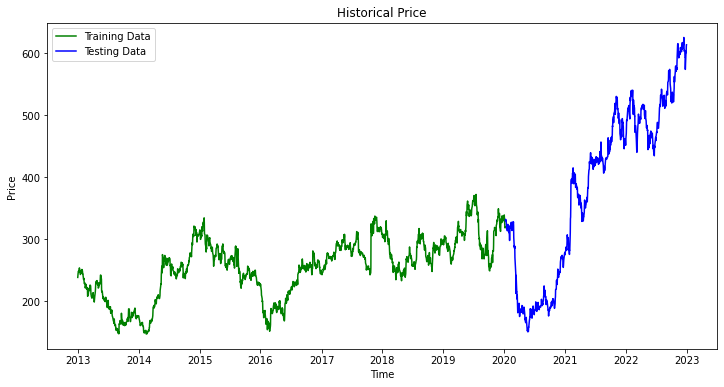

In [74]:
plt.figure(figsize=(12,6))
plt.title('Historical Price')
plt.plot(data_training,'g', label='Training Data')
plt.plot(data_testing,'b', label='Testing Data')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

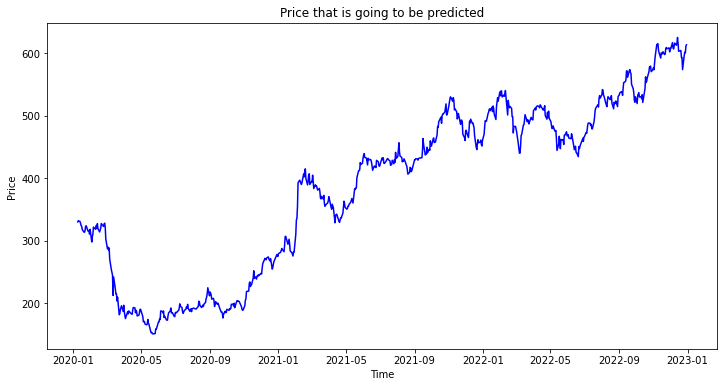

In [75]:
plt.figure(figsize=(12,6))
plt.title('Price that is going to be predicted')
plt.plot(data_testing,'b')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

## Plotting graph for the 4 models and calculating Root mean squared error

### Traditional LSTM (4 layers)

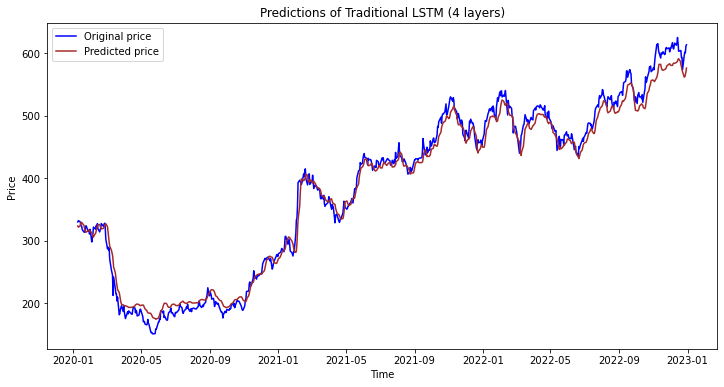

In [76]:
# 4 layer LSTM

plt.figure(figsize=(12,6))
plt.title('Predictions of Traditional LSTM (4 layers)')
plt.plot(y_testing, 'b', label="Original price")
plt.plot(y_pred1, 'brown', label="Predicted price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [77]:
# Normalized root mean squared error for Traditonal LSTM

mse = mean_squared_error(y_test, y_lstm4)
rmse = sqrt(mse)
nrmse = rmse/(y_lstm4.max()-y_lstm4.min())
rmse

0.03317019017454515

### Traditional GRU (4 layers)

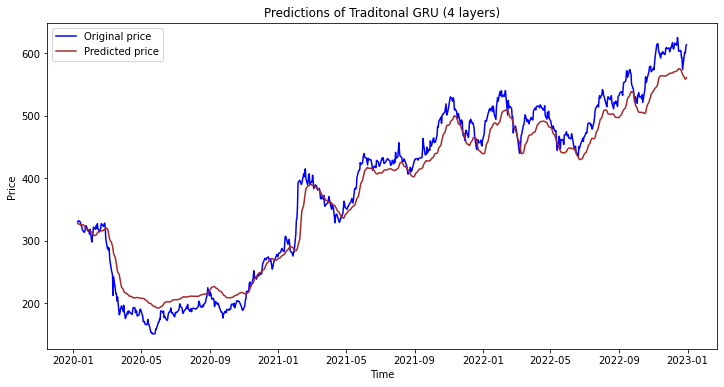

In [78]:
# 4 layer GRU

plt.figure(figsize=(12,6))
plt.title('Predictions of Traditonal GRU (4 layers)')
plt.plot(y_testing, 'b', label="Original price")
plt.plot(y_pred2, 'brown', label="Predicted price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [79]:
# Normalized root mean squared error for Traditonal GRU

mse = mean_squared_error(y_test, y_gru4)
rmse = sqrt(mse)
nrmse = rmse/(y_gru4.max()-y_gru4.min())
rmse

0.05488111439828226

### Hybrid LSTM-GRU (4 layers)

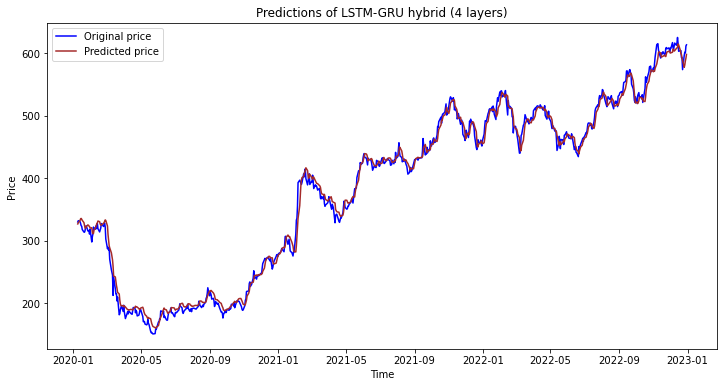

In [80]:
# 4 layer hybrid

plt.figure(figsize=(12,6))
plt.title('Predictions of LSTM-GRU hybrid (4 layers)')
plt.plot(y_testing, 'b', label="Original price")
plt.plot(y_pred3, 'brown', label="Predicted price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [81]:
# Normalized root mean squared error for Hybrid LSTM-GRU (4 layers)

mse = mean_squared_error(y_test, y_lstmgru4)
rmse = sqrt(mse)
nrmse = rmse/(y_lstmgru4.max()-y_lstmgru4.min())
rmse

0.022003355625566053

### Hybrid LSTM-GRU (6 layers)

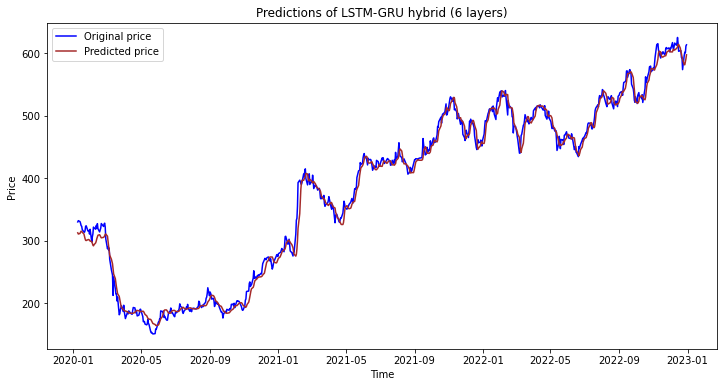

In [82]:
# 6 layer hybrid
plt.figure(figsize=(12,6))
plt.title('Predictions of LSTM-GRU hybrid (6 layers)')
plt.plot(y_testing, 'b', label="Original price")
plt.plot(y_pred4, 'brown', label="Predicted price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [83]:
# Normalized root mean squared error for Hybrid LSTM-GRU (6 layers)

mse = mean_squared_error(y_test, y_lstmgru6)
rmse = sqrt(mse)
nrmse = rmse/(y_lstmgru6.max()-y_lstmgru6.min())
rmse

0.0246351061320081

### Observing the change in accuracy by stacking LSTM/GRU layers

#### Traditional LSTM (1 layer)

In [84]:
# 1 layer lstm

# lstm1_model = Sequential()
# lstm1_model.add(LSTM(units=50, activation='relu', input_shape=(x_train.shape[1],1)))
# lstm1_model.add(Dropout(0.3))

# lstm1_model.add(Dense(units=1))

In [85]:
# lstm1_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# lstm1_model.fit(x_train, y_train, epochs = 50)

In [86]:
# lstm1_model.save('1layerLSTM.h5')

In [87]:
lstm1 = load_model('1layerLSTM.h5')

In [88]:
lstm1_pred = lstm1.predict(x_test)

24/24 [==============================] - 6s 157ms/step


In [89]:
lstm1_pred

array([[0.37047338],
       [0.36833152],
       [0.3666902 ],
       [0.36577237],
       [0.36536354],
       [0.36505014],
       [0.36454388],
       [0.36357778],
       [0.36195263],
       [0.35970175],
       [0.35712928],
       [0.35483304],
       [0.35323516],
       [0.35210708],
       [0.35107392],
       [0.3499976 ],
       [0.3486811 ],
       [0.34734502],
       [0.34549588],
       [0.34306106],
       [0.34047055],
       [0.33857024],
       [0.3377817 ],
       [0.33794463],
       [0.33892593],
       [0.34038138],
       [0.34224793],
       [0.34415329],
       [0.34554893],
       [0.3463067 ],
       [0.34667325],
       [0.3471941 ],
       [0.34799498],
       [0.34910437],
       [0.35052294],
       [0.3519183 ],
       [0.35228968],
       [0.35066396],
       [0.34694266],
       [0.34149277],
       [0.3349828 ],
       [0.32766503],
       [0.31935912],
       [0.31002733],
       [0.29972106],
       [0.28865334],
       [0.27729228],
       [0.265

In [90]:
lstm1_pred_og = lstm1_pred*(ma-mi)+mi

In [91]:
lstm1_pred_og

array([[326.6952 ],
       [325.67856],
       [324.8995 ],
       [324.46387],
       [324.2698 ],
       [324.12103],
       [323.88074],
       [323.42218],
       [322.65082],
       [321.58246],
       [320.36142],
       [319.27148],
       [318.51306],
       [317.97763],
       [317.48724],
       [316.97638],
       [316.3515 ],
       [315.71732],
       [314.83963],
       [313.68393],
       [312.45435],
       [311.55237],
       [311.1781 ],
       [311.25543],
       [311.7212 ],
       [312.41205],
       [313.29797],
       [314.20236],
       [314.8648 ],
       [315.2245 ],
       [315.39847],
       [315.6457 ],
       [316.02582],
       [316.5524 ],
       [317.2257 ],
       [317.88803],
       [318.0643 ],
       [317.29266],
       [315.52634],
       [312.93954],
       [309.8496 ],
       [306.37622],
       [302.4338 ],
       [298.00446],
       [293.1126 ],
       [287.8593 ],
       [282.4668 ],
       [277.05847],
       [271.46252],
       [265.9357 ],


In [92]:
y_lstm1 = pd.DataFrame(lstm1_pred_og,columns=['Predicted Price'],index=data_testing.index)

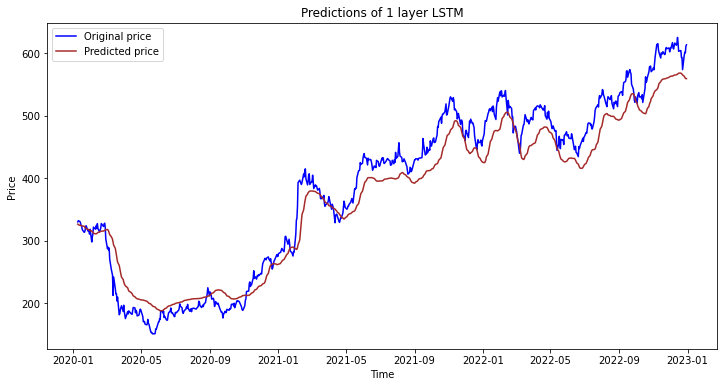

In [93]:
plt.figure(figsize=(12,6))
plt.title('Predictions of 1 layer LSTM')
plt.plot(y_testing, 'b', label="Original price")
plt.plot(y_lstm1, 'brown', label="Predicted price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [94]:
mse = mean_squared_error(y_test, lstm1_pred)
rmse = sqrt(mse)
nrmse = rmse/(lstm1_pred.max()-lstm1_pred.min())
rmse

0.07023779269450801

#### Traditional LSTM (2 layers)

In [95]:
# 2 layer lstm

# lstm2_model = Sequential()
# lstm2_model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
# lstm2_model.add(Dropout(0.3))

# lstm2_model.add(LSTM(units=50, activation='relu'))
# lstm2_model.add(Dropout(0.3))

# lstm2_model.add(Dense(units=1))

In [96]:
# lstm2_model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
# lstm2_model.fit(x_train, y_train, epochs = 50)

In [97]:
# lstm2_model.save('2layerLSTM.h5')

In [98]:
lstm2 = load_model('2layerLSTM.h5')

In [99]:
lstm2_pred = lstm2.predict(x_test)

24/24 [==============================] - 4s 94ms/step


In [100]:
lstm2_pred

array([[0.37290773],
       [0.36931068],
       [0.36585253],
       [0.36349905],
       [0.36256337],
       [0.36260498],
       [0.36289996],
       [0.36263248],
       [0.3612333 ],
       [0.35858357],
       [0.35498145],
       [0.35115802],
       [0.34790832],
       [0.34553373],
       [0.34390366],
       [0.34278902],
       [0.34172252],
       [0.34065694],
       [0.33894667],
       [0.3364093 ],
       [0.33333758],
       [0.33057648],
       [0.3291097 ],
       [0.32938033],
       [0.33153778],
       [0.33494642],
       [0.33923146],
       [0.3434506 ],
       [0.34641126],
       [0.34772235],
       [0.34760305],
       [0.34683183],
       [0.34602168],
       [0.3458367 ],
       [0.34678137],
       [0.34847528],
       [0.34933993],
       [0.34811026],
       [0.3441577 ],
       [0.33616102],
       [0.32539964],
       [0.31425276],
       [0.30271718],
       [0.29018936],
       [0.27655685],
       [0.26220468],
       [0.24791116],
       [0.234

In [101]:
lstm2_pred_og = lstm2_pred*(ma-mi)+mi

In [102]:
lstm2_pred_og

array([[327.85065],
       [326.1433 ],
       [324.5019 ],
       [323.38483],
       [322.9407 ],
       [322.96045],
       [323.10046],
       [322.9735 ],
       [322.3094 ],
       [321.0517 ],
       [319.34195],
       [317.52716],
       [315.98468],
       [314.8576 ],
       [314.08386],
       [313.5548 ],
       [313.04858],
       [312.54282],
       [311.73105],
       [310.52667],
       [309.06866],
       [307.75812],
       [307.06192],
       [307.19037],
       [308.21442],
       [309.83234],
       [311.8662 ],
       [313.86884],
       [315.2741 ],
       [315.89642],
       [315.83978],
       [315.47372],
       [315.0892 ],
       [315.0014 ],
       [315.44977],
       [316.25378],
       [316.66418],
       [316.08054],
       [314.20447],
       [310.4088 ],
       [305.30096],
       [300.01007],
       [294.53473],
       [288.58838],
       [282.1177 ],
       [275.30545],
       [268.52103],
       [262.12073],
       [256.31738],
       [251.18546],


In [103]:
y_lstm2 = pd.DataFrame(lstm2_pred_og,columns=['Predicted Price'],index=data_testing.index)

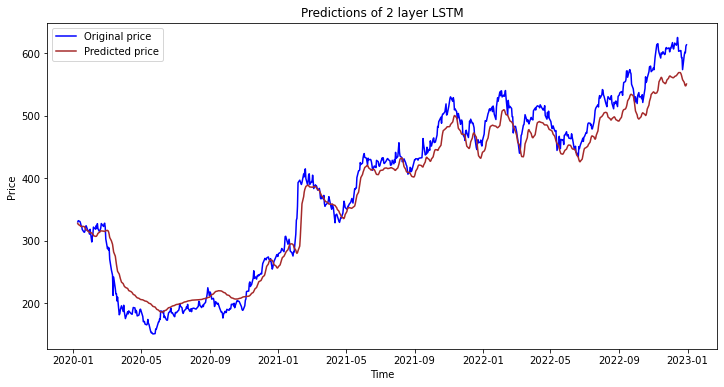

In [104]:
plt.figure(figsize=(12,6))
plt.title('Predictions of 2 layer LSTM')
plt.plot(y_testing, 'b', label="Original price")
plt.plot(y_lstm2, 'brown', label="Predicted price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [105]:
mse = mean_squared_error(y_test, lstm2_pred)
rmse = sqrt(mse)
nrmse = rmse/(lstm2_pred.max()-lstm2_pred.min())
nrmse

0.0706804151910052

#### LSTM-GRU Hybrid (2 layers)

In [106]:
# 2 layer lstm gru

# lstmgru2_model = Sequential()
# lstmgru2_model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
# lstmgru2_model.add(Dropout(0.3))

# lstmgru2_model.add(GRU(units=50, activation='relu'))
# lstm2_model.add(Dropout(0.3))

# lstmgru2_model.add(Dense(units=1))

In [107]:
# lstmgru2_model.save('2layerLSTM-GRU.h5')

In [108]:
lstmgru2 = load_model('2layerLSTM-GRU.h5')

In [109]:
lstmgru2_pred = lstmgru2.predict(x_test)

24/24 [==============================] - 2s 55ms/step


In [110]:
lstmgru2_pred

array([[0.34342998],
       [0.33657286],
       [0.3369455 ],
       [0.3425342 ],
       [0.34832117],
       [0.35043052],
       [0.34844032],
       [0.34230256],
       [0.3335893 ],
       [0.3243296 ],
       [0.31691524],
       [0.31416184],
       [0.31684384],
       [0.31979227],
       [0.32042778],
       [0.319093  ],
       [0.31536022],
       [0.31229514],
       [0.30613235],
       [0.29910746],
       [0.29403555],
       [0.29473752],
       [0.30120307],
       [0.30992162],
       [0.31981474],
       [0.32723242],
       [0.33362162],
       [0.33625275],
       [0.3337585 ],
       [0.32907322],
       [0.32502857],
       [0.3254069 ],
       [0.3284343 ],
       [0.3335115 ],
       [0.3395181 ],
       [0.34248066],
       [0.33713073],
       [0.32404783],
       [0.30748624],
       [0.2905072 ],
       [0.2760344 ],
       [0.26295382],
       [0.24976462],
       [0.23626584],
       [0.22084686],
       [0.20673278],
       [0.19374257],
       [0.181

In [111]:
lstmgru2_pred_og = lstmgru2_pred*(ma-mi)+mi

In [112]:
lstmgru2_pred_og

array([[313.85904],
       [310.6043 ],
       [310.7812 ],
       [313.43387],
       [316.18066],
       [317.18185],
       [316.23718],
       [313.3239 ],
       [309.18817],
       [304.79306],
       [301.2738 ],
       [299.96692],
       [301.23993],
       [302.6394 ],
       [302.94104],
       [302.3075 ],
       [300.53574],
       [299.08087],
       [296.1557 ],
       [292.82135],
       [290.414  ],
       [290.74716],
       [293.81604],
       [297.95428],
       [302.6501 ],
       [306.17087],
       [309.2035 ],
       [310.4524 ],
       [309.2685 ],
       [307.04462],
       [305.12482],
       [305.30438],
       [306.74133],
       [309.15125],
       [312.00226],
       [313.40845],
       [310.8691 ],
       [304.6593 ],
       [296.79834],
       [288.73926],
       [281.86975],
       [275.66104],
       [269.4008 ],
       [262.9936 ],
       [255.67496],
       [248.97571],
       [242.8099 ],
       [237.02022],
       [231.76   ],
       [226.78867],


In [113]:
y_lstmgru2 = pd.DataFrame(lstmgru2_pred_og,columns=['Predicted Price'],index=data_testing.index)

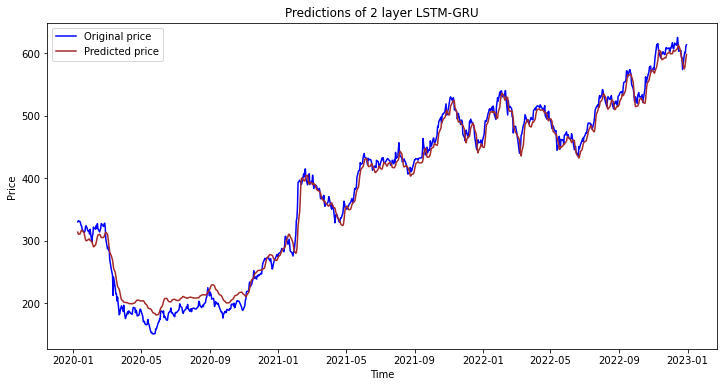

In [114]:
plt.figure(figsize=(12,6))
plt.title('Predictions of 2 layer LSTM-GRU')
plt.plot(y_testing, 'b', label="Original price")
plt.plot(y_lstmgru2, 'brown', label="Predicted price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [115]:
mse = mean_squared_error(y_test, lstmgru2_pred)
rmse = sqrt(mse)
nrmse = rmse/(lstmgru2_pred.max()-lstmgru2_pred.min())
nrmse

0.035091685632909625